In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from os import path
import random
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imutils import paths

Displaying image

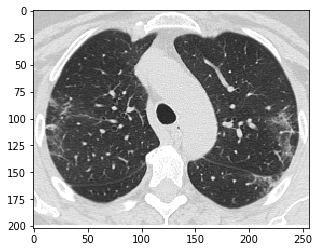

In [2]:
img = cv2.imread("./SARS_CTSCAN/COVID/Covid (1).png")
plt.imshow(img)

Setting path

In [3]:
path = "./SARS_CTSCAN"

path = list(paths.list_images(path)) # path now is a list containing paths of all images in both the folders

Lists to store gray images and labels

In [4]:
raw_images = []
labels = []

Utility Functions

In [5]:
def getLabel(image_path):
    
    return os.path.split(image_path)[-1].split(" ")[0] 

In [6]:
def goRaw(image_path):
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100,100)).flatten()
    
    return img

In [7]:
def procImg():
    if(len(path)) % 2!= 0:
        even_len = len(path) - 1
    else:
        even_len = len(path)

    for(i, image_path) in enumerate (path):
    
        labels.append(getLabel(image_path)) # covid (x).png/ covid (y).png
    
        raw_images.append(goRaw(image_path))
   
        if i>0 and i%100 == 0:
            print("Processed (" + str(i) + "/" + str(len(path)) + ") images")
    
        if i>0 and even_len/i == 2:
            print("\nHalf Way There...\n")
    
        if i == len(path) - 1:
            print("-----------------------------------")
            print("Processed (" + str(i+1) + "/" + str(len(path)) + ") images :)")
            print("-----------------------------------")

In [8]:
def evalModel():
    
    print("Training Accuracy: ", accuracy_score(y_train, knn.predict(X_train)))
    print("-------------------------------")
    
    pred = knn.predict(X_test)
    print("Testing Accuracy: ", accuracy_score(y_test, pred))
    print("-------------------------------")
    
    print("Classification Report:")
    print(classification_report(y_test, pred))
    print("-------------------------------")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    

In [9]:
procImg()

Processed (100/2481) images
Processed (200/2481) images
Processed (300/2481) images
Processed (400/2481) images
Processed (500/2481) images
Processed (600/2481) images
Processed (700/2481) images
Processed (800/2481) images
Processed (900/2481) images
Processed (1000/2481) images
Processed (1100/2481) images
Processed (1200/2481) images

Half Way There...

Processed (1300/2481) images
Processed (1400/2481) images
Processed (1500/2481) images
Processed (1600/2481) images
Processed (1700/2481) images
Processed (1800/2481) images
Processed (1900/2481) images
Processed (2000/2481) images
Processed (2100/2481) images
Processed (2200/2481) images
Processed (2300/2481) images
Processed (2400/2481) images
-----------------------------------
Processed (2481/2481) images :)
-----------------------------------


Defining train-test split and standardizing values

In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(raw_images, labels, test_size=0.20, random_state=10)

sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Initializng Classifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=100)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

Evaluation

In [12]:
evalModel()

Training Accuracy:  0.7394153225806451
-------------------------------
Testing Accuracy:  0.7605633802816901
-------------------------------
Classification Report:
              precision    recall  f1-score   support

       Covid       0.94      0.56      0.70       248
   Non-Covid       0.69      0.96      0.80       249

    accuracy                           0.76       497
   macro avg       0.81      0.76      0.75       497
weighted avg       0.81      0.76      0.75       497

-------------------------------
Confusion Matrix:
[[138 110]
 [  9 240]]
